# Billionaire Statistical Analysis

In [26]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("once")
%matplotlib inline

## Data Cleaning & Summary
Here is a breakdown of the columns in the dataset:
- rank: The ranking of the billionaire in terms of wealth.
- finalWorth: The final net worth of the billionaire in U.S. dollars.
- category: The category or industry in which the billionaire's business operates.
- personName: The full name of the billionaire.
- age: The age of the billionaire.
- country: The country in which the billionaire resides.
- city: The city in which the billionaire resides.
- source: The source of the billionaire's wealth.
- industries: The industries associated with the billionaire's business interests.
- countryOfCitizenship: The country of citizenship of the billionaire.
- organization: The name of the organization or company associated with the billionaire.
- selfMade: Indicates whether the billionaire is self-made (True/False).
- status: "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.
- gender: The gender of the billionaire.
- birthDate: The birthdate of the billionaire.
- lastName: The last name of the billionaire.
- firstName: The first name of the billionaire.
- title: The title or honorific of the billionaire.
- date: The date of data collection.
- state: The state in which the billionaire resides.
- residenceStateRegion: The region or state of residence of the billionaire.
- birthYear: The birth year of the billionaire.
- birthMonth: The birth month of the billionaire.
- birthDay: The birth day of the billionaire.
- cpi_country: Consumer Price Index (CPI) for the billionaire's country.
- cpi_change_country: CPI change for the billionaire's country.
- gdp_country: Gross Domestic Product (GDP) for the billionaire's country.
- gross_tertiary_education_enrollment: Enrollment in tertiary education in the billionaire's country.
- gross_primary_education_enrollment_country: Enrollment in primary education in the billionaire's country.
- life_expectancy_country: Life expectancy in the billionaire's country.
- tax_revenue_country_country: Tax revenue in the billionaire's country.
- total_tax_rate_country: Total tax rate in the billionaire's country.
- population_country: Population of the billionaire's country.
- latitude_country: Latitude coordinate of the billionaire's country.
- longitude_country: Longitude coordinate of the billionaire's country.

In [27]:
df = pd.read_csv('data.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


### Data Cleaning

#### Dropping Redundant Columns
From the dataset, we don't need the the following columns:
- `rank`: can already be deduced from `finalWorth`
- `birthMonth`, `birthDay` and `birthYear`: we already have `birthDate` as an entry in the data.
- `firstName` and `lastName`: we already have `personName` in the data
- `status`: redundant column as `selfMade` gives the same output

In [28]:
print(f"Initial Columns: {df.columns.shape[0]}")
df = df.drop(columns=['rank','birthDay', 'birthMonth', 'birthYear', 'firstName','lastName', 'status'])
print(f"Final Columns: {df.columns.shape[0]}")

Initial Columns: 35
Final Columns: 28


#### Exploring Missingness

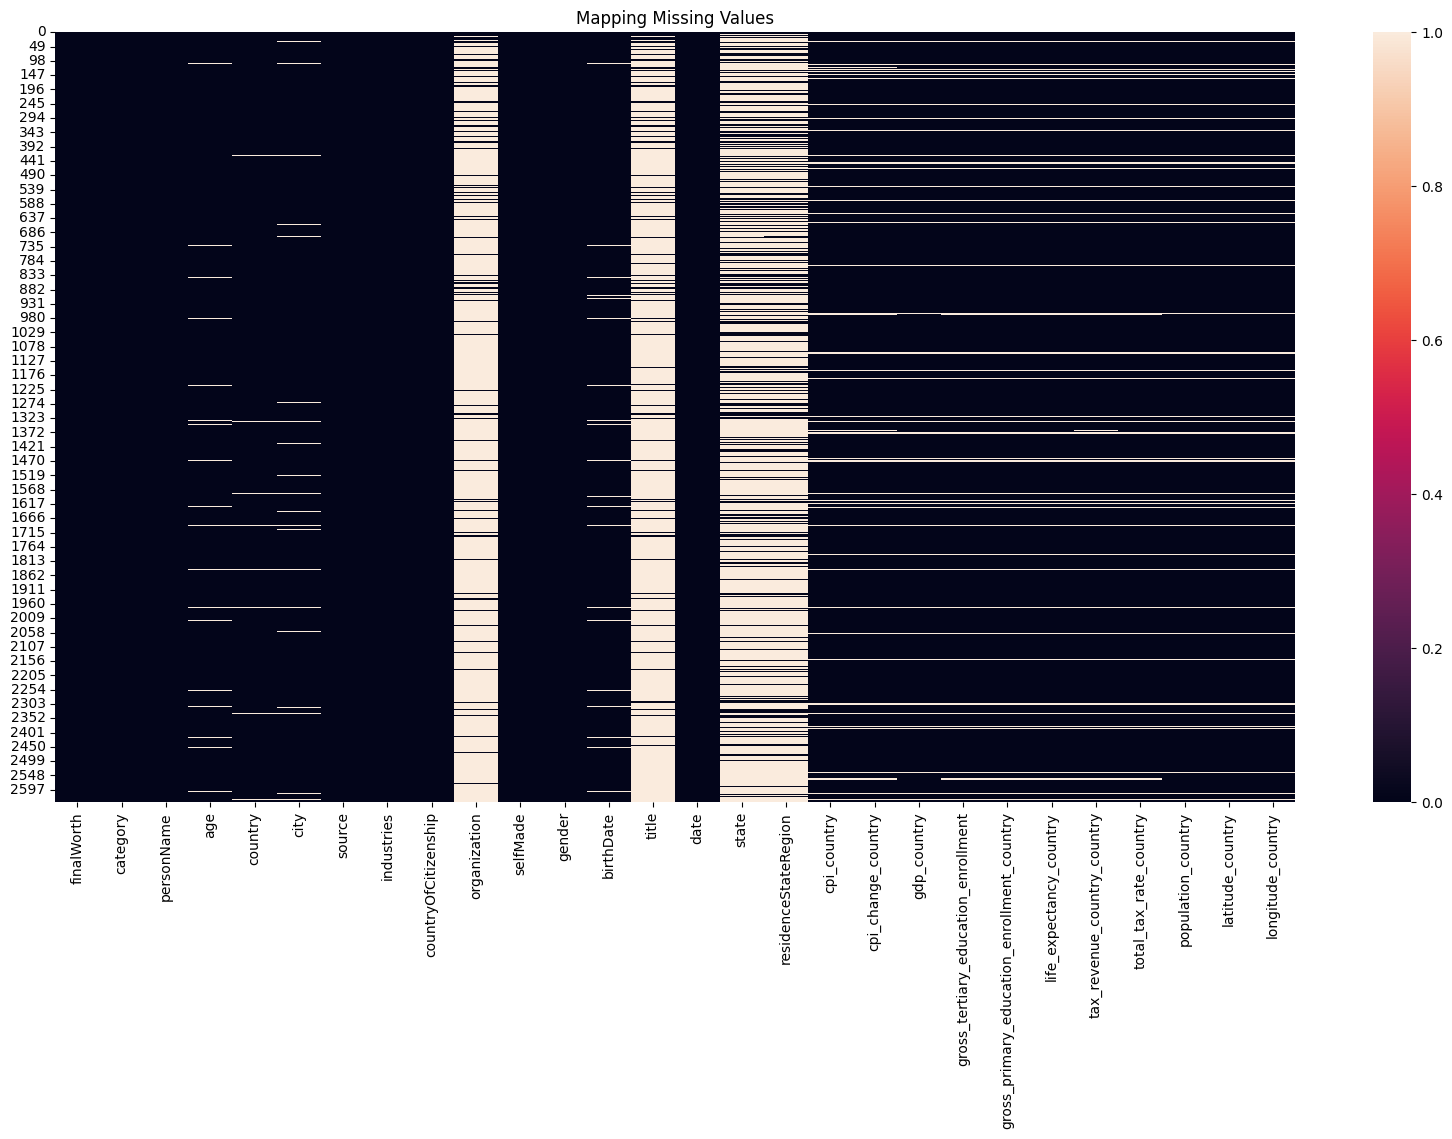

In [29]:
## Visualising Missing Values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.title("Mapping Missing Values")
plt.show()

We'll drop columns where 50% of the data is missing as we can't deduce much from them i.e. `organization`, `title`, `state`, `residenceStateRegion`. It worth noting that `state` and `residenceStateRegion` exhibit structural missingness. When country of residence was not `United States`, these entries were missing.

In [30]:
print(f"Initial Columns: {df.columns.shape[0]}")
df = df.drop(columns=['organization','title', 'state', 'residenceStateRegion'])
print(f"Final Columns: {df.columns.shape[0]}")

Initial Columns: 28
Final Columns: 24


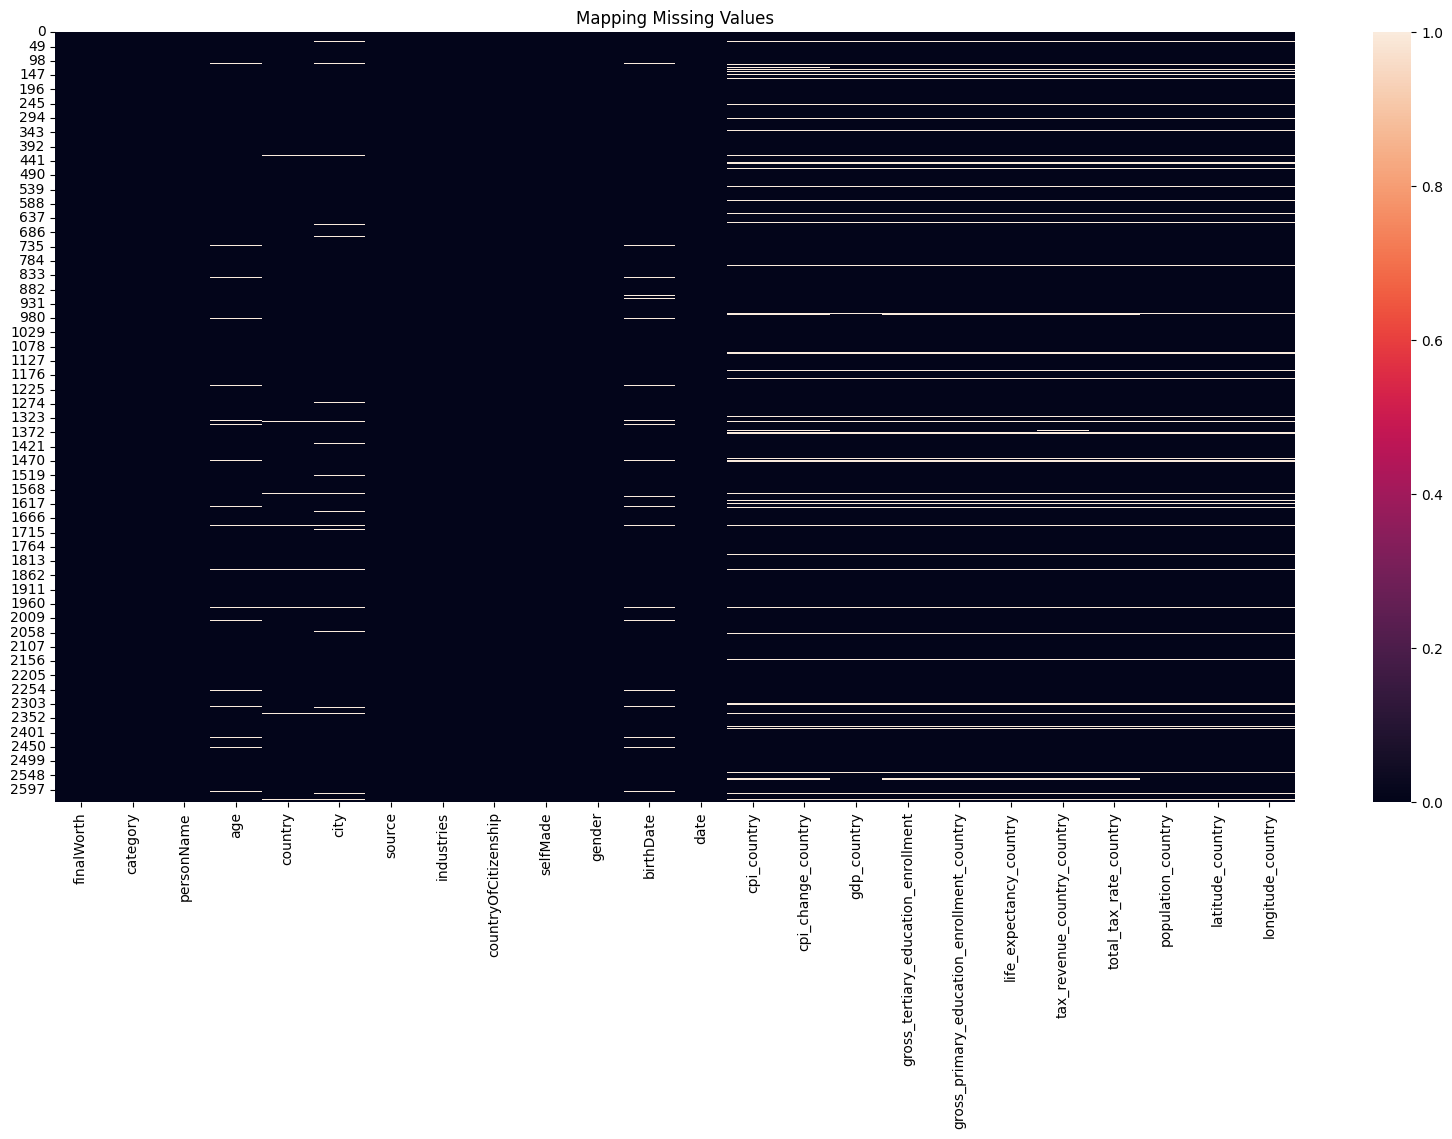

In [31]:
## Visualising Missing Values (After dropping extremely affected columns)
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.title("Mapping Missing Values")
plt.show()

### Data Summary

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   finalWorth                                  2640 non-null   int64  
 1   category                                    2640 non-null   object 
 2   personName                                  2640 non-null   object 
 3   age                                         2575 non-null   float64
 4   country                                     2602 non-null   object 
 5   city                                        2568 non-null   object 
 6   source                                      2640 non-null   object 
 7   industries                                  2640 non-null   object 
 8   countryOfCitizenship                        2640 non-null   object 
 9   selfMade                                    2640 non-null   bool   
 10  gender      

In [33]:
df.describe()

,finalWorth,age,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2575.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,4623.787879,65.140194,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,9834.240939,13.258098,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1000.000000,18.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,1500.000000,56.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,2300.000000,65.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,4200.000000,75.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,211000.000000,101.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


## Data Splits & Preparation
The data seems to have statistics unique to a billionaire, and other statistics that are unique to the country. This calls for a separation of the datasets into:
1. Billionaire Unique Observations
2. Country Unique Observations

Therefore, we can explore what individual statistics are likely to make one a billionaire. On the other hand, we can explore how a countries macroenvironment can influence the number of billionaires it habours.

In [34]:
personal = ['finalWorth', 'category', 'personName', 'age', 'country', 'city','source', 'industries', 'countryOfCitizenship', 
            'selfMade', 'gender','birthDate', 'date']
country = ['country','cpi_country', 'cpi_change_country', 'gdp_country','gross_tertiary_education_enrollment',
           'gross_primary_education_enrollment_country', 'life_expectancy_country','tax_revenue_country_country', 
           'total_tax_rate_country','population_country', 'latitude_country', 'longitude_country']
print(f"Personal data columns: {len(personal)}; Country data columns: {len(country)}")

Personal data columns: 13; Country data columns: 12


### Personal Data Exploration

In [35]:
personal_df = df[personal]
print(personal_df.shape)
personal_df.head()

(2640, 13)


,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,selfMade,gender,birthDate,date
0,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,False,M,3/5/1949 0:00,4/4/2023 5:01
1,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,True,M,6/28/1971 0:00,4/4/2023 5:01
2,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,True,M,1/12/1964 0:00,4/4/2023 5:01
3,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,True,M,8/17/1944 0:00,4/4/2023 5:01
4,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,True,M,8/30/1930 0:00,4/4/2023 5:01


In [36]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   finalWorth            2640 non-null   int64  
 1   category              2640 non-null   object 
 2   personName            2640 non-null   object 
 3   age                   2575 non-null   float64
 4   country               2602 non-null   object 
 5   city                  2568 non-null   object 
 6   source                2640 non-null   object 
 7   industries            2640 non-null   object 
 8   countryOfCitizenship  2640 non-null   object 
 9   selfMade              2640 non-null   bool   
 10  gender                2640 non-null   object 
 11  birthDate             2564 non-null   object 
 12  date                  2640 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 250.2+ KB


### Country Data Exploration

In [37]:
country_df = df[country]
print(country_df.shape)
country_df.head()

(2640, 12)


,country,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,France,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,United States,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,United States,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,United States,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,United States,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [38]:
country_df = country_df.drop_duplicates() #Eliminate duplicate entries of countries after dropping billionnaire data
country_df = country_df.reset_index()
country_df = country_df.drop(columns=['index'])
print(country_df.shape)
country_df.head()

(79, 12)


,country,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,France,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,United States,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,Mexico,141.54,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
3,India,180.44,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
4,Spain,110.96,0.7,"$1,394,116,310,769",88.9,102.7,83.3,14.2,47.0,4.707678e+07,40.463667,-3.749220


#### Feature Creation

In [39]:
# Get aggregate data on the number of billionaires per country
bill_count = personal_df[['country','personName']].groupby('country').agg({'personName':'count'})
bill_count = bill_count.rename(columns={'country':'country','personName':'billionaireCount'}).reset_index()
bill_count.head()

,country,billionaireCount
0,Algeria,1
1,Andorra,1
2,Argentina,4
3,Armenia,1
4,Australia,43


In [40]:
country_df = country_df.set_index('country')
bill_count = bill_count.set_index('country')
country_df = country_df.join(bill_count).reset_index()
print(country_df.shape)
country_df.head()

(79, 13)


,country,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,billionaireCount
0,France,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,35.0
1,United States,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,754.0
2,Mexico,141.54,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784,13.0
3,India,180.44,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880,157.0
4,Spain,110.96,0.7,"$1,394,116,310,769",88.9,102.7,83.3,14.2,47.0,4.707678e+07,40.463667,-3.749220,25.0


In [41]:
#Clean up GDP entry which is currently an object
gdp_cleaned = []
for i in country_df.gdp_country.astype('str'):
    try:
        i = re.sub(",", "",i)
        i = int(re.sub("\$", "",i))
        gdp_cleaned.append(i)
    except:
        gdp_cleaned.append(None)

country_df['gdp_country'] = gdp_cleaned
country_df.head()

<>:6: DeprecationWarning: invalid escape sequence '\$'


,country,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,billionaireCount
0,France,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,35.0
1,United States,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,754.0
2,Mexico,141.54,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784,13.0
3,India,180.44,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880,157.0
4,Spain,110.96,0.7,1.394116e+12,88.9,102.7,83.3,14.2,47.0,4.707678e+07,40.463667,-3.749220,25.0


In [42]:
## Add per capita data on GDP and on Billionaire Count
country_df['gdp_per_capita'] = country_df.gdp_country/country_df.population_country
country_df['bill_per_capita'] = country_df.billionaireCount/country_df.population_country
country_df.head()

,country,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,billionaireCount,gdp_per_capita,bill_per_capita
0,France,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,35.0,40493.928572,5.219215e-07
1,United States,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,754.0,65280.682241,2.297103e-06
2,Mexico,141.54,3.6,1.258287e+12,40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784,13.0,9985.291138,1.031631e-07
3,India,180.44,7.7,2.611000e+12,28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880,157.0,1910.835828,1.148990e-07
4,Spain,110.96,0.7,1.394116e+12,88.9,102.7,83.3,14.2,47.0,4.707678e+07,40.463667,-3.749220,25.0,29613.671138,5.310474e-07


#### Data Summary

In [45]:
#Reduce length of column names
country_df = country_df.rename(columns={'cpi_country':'cpi','cpi_change_country':'cpi_change','gdp_country':'gdp',
                                        'gross_tertiary_education_enrollment':'tertiary_enrol','gross_primary_education_enrollment_country':'primary_enrol',
                                        'life_expectancy_country':'life_expectancy','tax_revenue_country_country':'tax_revenue','total_tax_rate_country':'tax_rate',
                                        'population_country':'population','latitude_country':'latitude','longitude_country':'longitude','billionaireCount':'billionaires'})
print(country_df.columns)

Index(['country', 'cpi', 'cpi_change', 'gdp', 'tertiary_enrol',
       'primary_enrol', 'life_expectancy', 'tax_revenue', 'tax_rate',
       'population', 'latitude', 'longitude', 'billionaires', 'gdp_per_capita',
       'bill_per_capita'],
      dtype='object')


In [46]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          78 non-null     object 
 1   cpi              64 non-null     float64
 2   cpi_change       64 non-null     float64
 3   gdp              68 non-null     float64
 4   tertiary_enrol   66 non-null     float64
 5   primary_enrol    67 non-null     float64
 6   life_expectancy  66 non-null     float64
 7   tax_revenue      65 non-null     float64
 8   tax_rate         66 non-null     float64
 9   population       68 non-null     float64
 10  latitude         68 non-null     float64
 11  longitude        68 non-null     float64
 12  billionaires     78 non-null     float64
 13  gdp_per_capita   68 non-null     float64
 14  bill_per_capita  68 non-null     float64
dtypes: float64(14), object(1)
memory usage: 9.4+ KB


In [47]:
country_df.describe()

,cpi,cpi_change,gdp,tertiary_enrol,primary_enrol,life_expectancy,tax_revenue,tax_rate,population,latitude,longitude,billionaires,gdp_per_capita,bill_per_capita
count,64.000000,64.000000,6.800000e+01,66.000000,67.000000,66.000000,65.000000,66.000000,6.800000e+01,68.000000,68.000000,78.000000,68.000000,6.800000e+01
mean,138.503125,3.587500,1.269134e+12,57.475758,103.507463,77.334848,17.495385,39.101515,8.565026e+07,28.691898,29.039505,33.358974,30498.888901,7.822247e-06
std,43.546660,6.972451,3.538159e+12,26.923196,7.929544,5.442525,7.294228,15.922490,2.361105e+08,26.645996,59.653641,104.193249,35142.906369,5.286818e-05
min,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771,1.000000,1071.050761,1.492808e-08
25%,113.965000,0.800000,1.153995e+11,36.425000,100.000000,75.075000,12.500000,28.900000,5.789807e+06,15.417105,5.085934,1.250000,6841.368734,1.258421e-07
50%,118.840000,2.150000,3.359404e+11,60.850000,102.500000,77.600000,17.100000,38.000000,2.256157e+07,36.647532,22.380909,5.000000,17156.053363,3.528544e-07
75%,143.950000,3.525000,7.930764e+11,80.375000,106.250000,81.675000,23.000000,46.925000,6.193165e+07,47.642066,58.127875,25.750000,44260.223110,1.209014e-06
max,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971,754.000000,184396.986783,4.363002e-04


## Exploratory Data Analysis
We'll focus on investigating country-specific features and how they affect the billionaire distribution in a particular country.

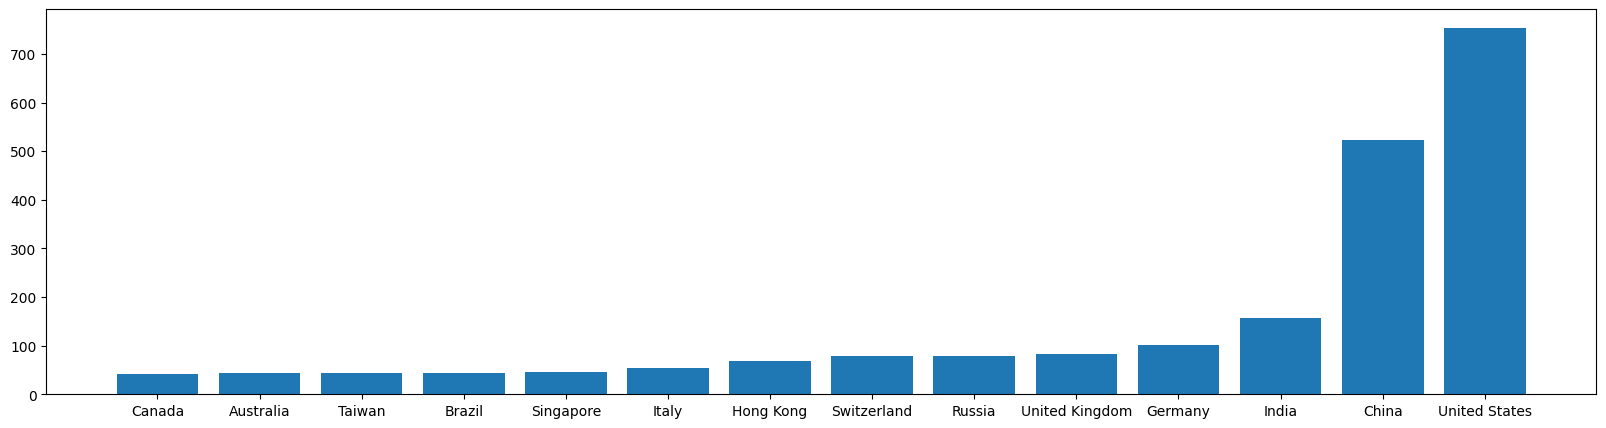

In [177]:
plt.figure(figsize=(20,10))


plt.subplot()
data = country_df[country_df.billionaireCount > 40].sort_values('billionaireCount')
plt.bar(data.country.astype('str'),data.billionaireCount)
plt.show()

In [ ]:
### Horizontal bar for billionaires per capita

<Axes: >

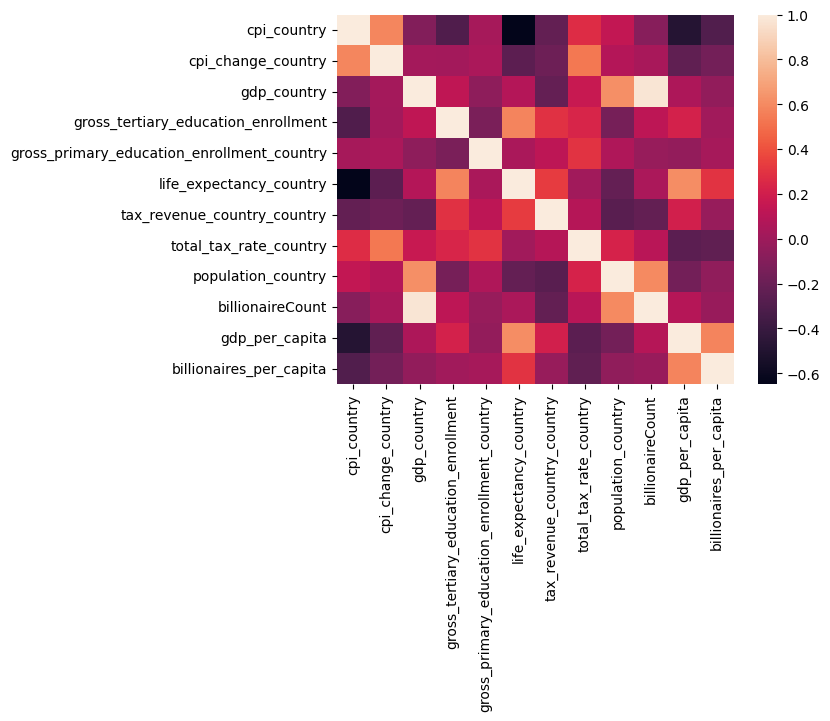

In [22]:
data = country_df.drop(columns=['country','latitude_country','longitude_country'])
sns.heatmap(data.corr(),)

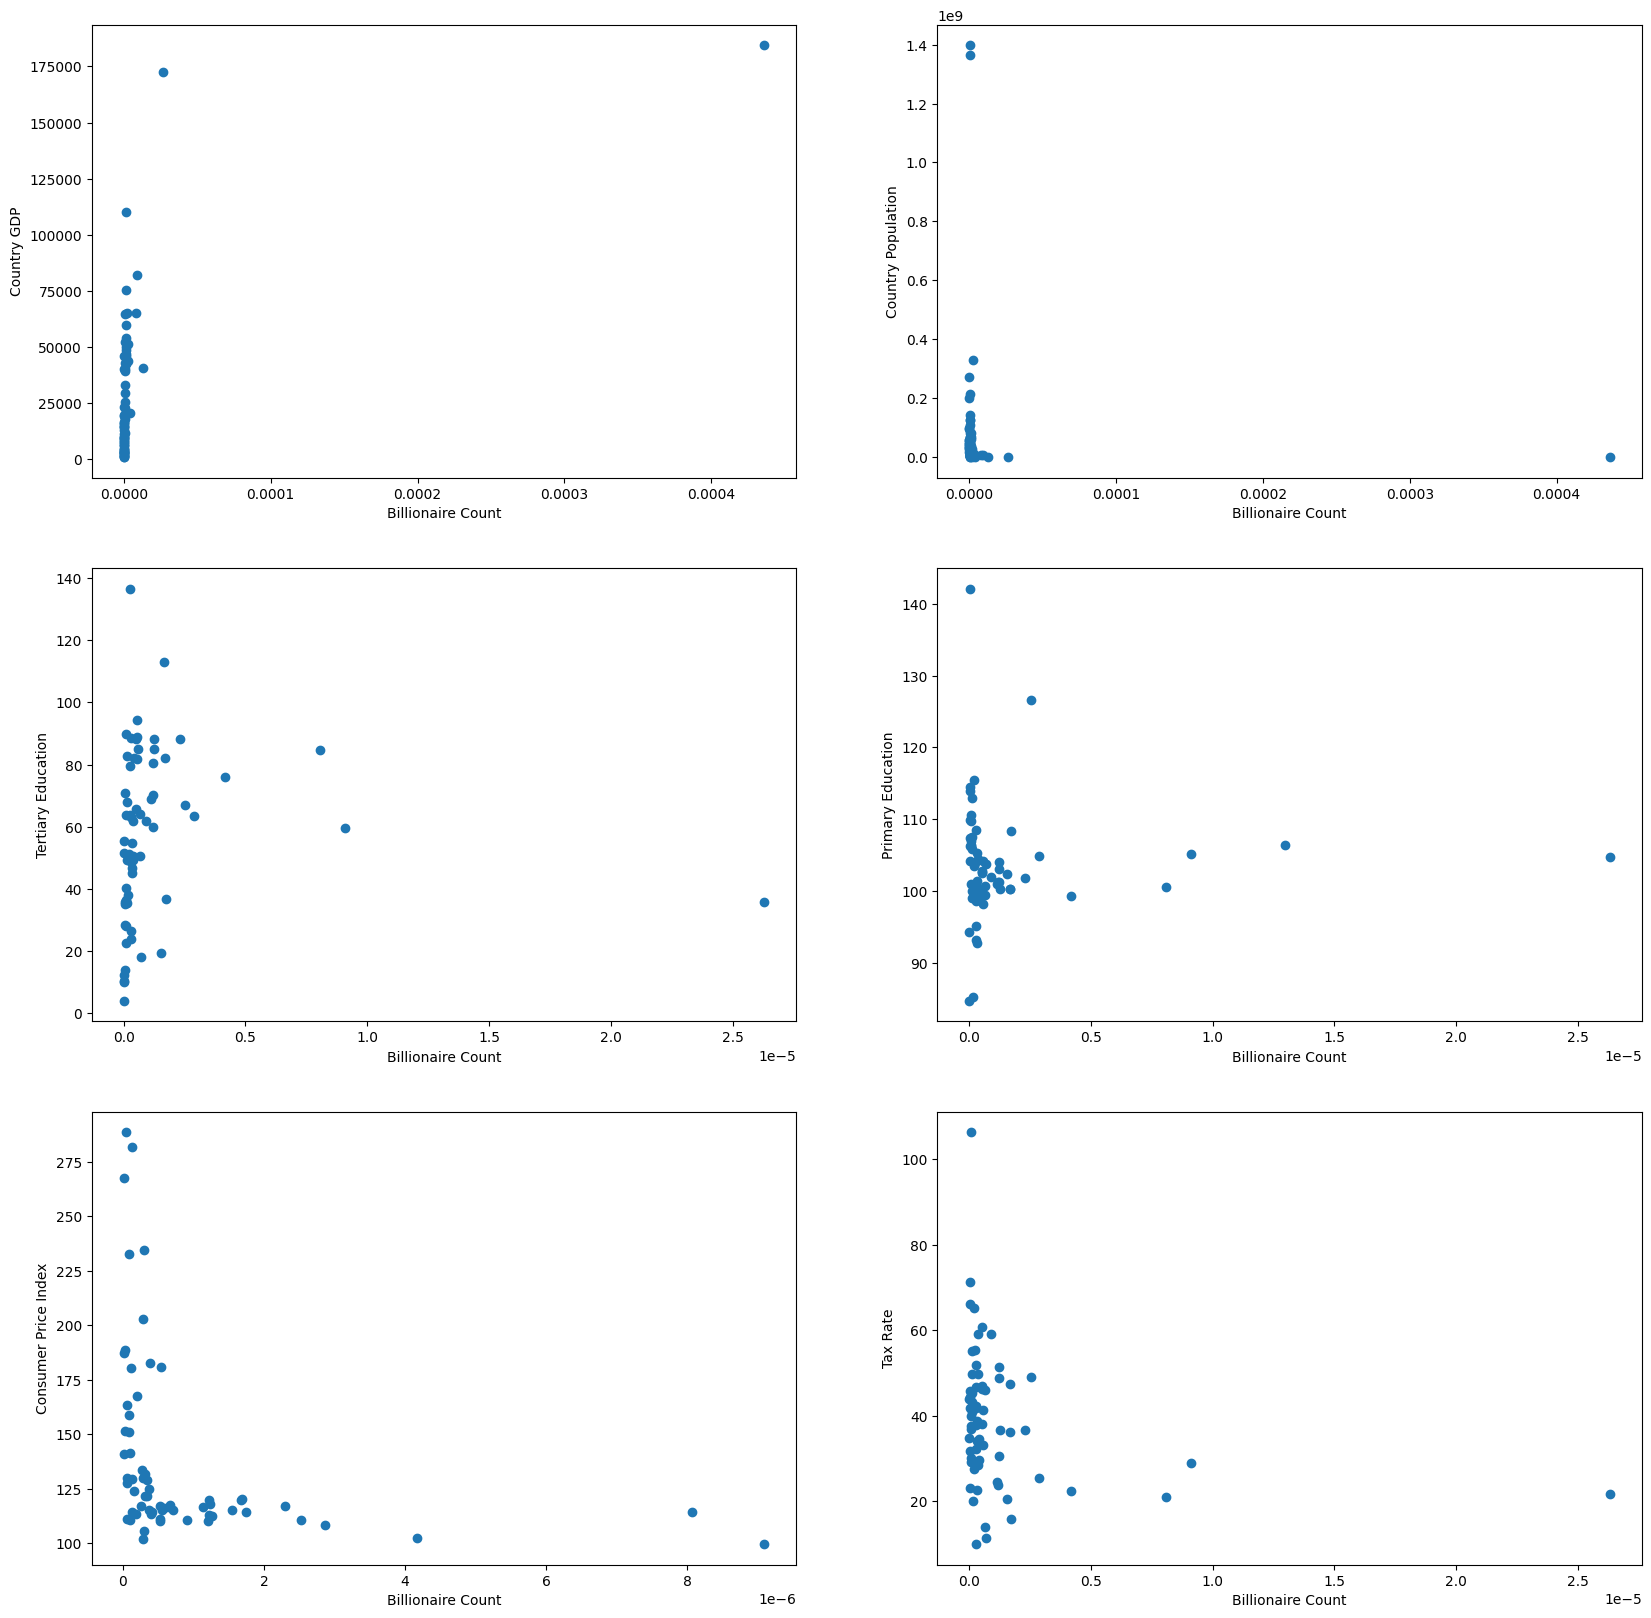

In [180]:
plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
plt.scatter(country_df.billionaires_per_capita, country_df.population_country)
plt.xlabel('Billionaires per Capita')
plt.ylabel('Total Population')

plt.subplot(5,2,2)
plt.scatter(country_df.billionaires_per_capita, country_df.gdp_country)
plt.xlabel('Billionaires per Capita')
plt.ylabel('GDP')

plt.subplot(5,2,3)
plt.scatter(country_df.billionaires_per_capita, country_df.gross_tertiary_education_enrollment)
plt.xlabel('Billionaires per Capita')
plt.ylabel('Tertiary Education')

plt.subplot(5,2,4)
plt.scatter(country_df.billionaires_per_capita, country_df.gross_primary_education_enrollment_country)
plt.xlabel('Billionaires per Capita')
plt.ylabel('Primary Education')

plt.subplot(5,2,5)
plt.scatter(country_df.billionaires_per_capita, country_df.cpi_country)
plt.xlabel('Billionaires per Capita')
plt.ylabel('Consumer Price Index')

plt.subplot(5,2,6)
plt.scatter(country_df.billionaires_per_capita, country_df.total_tax_rate_country)
plt.xlabel('Billionaires per Capita')
plt.ylabel('Tax Rate')

plt.subplot(5,2,7)

plt.subplot(5,2,8)

plt.subplot(5,2,9)
plt.scatter(country_df.billionaires_per_capita, country_df.gdp_per_capita)
plt.xlabel('Billionaires per Capita')
plt.ylabel('GDP per Capita')

plt.subplot(5,2,10)

plt.show()